Conculsion -- not the best fit. The lack of an elbow, with or without pca, makes it not particularly strong without going to a no-longer helpful number of clusters significantly greater than the current market.

This is likely because k means is not well suited to handling mixed data, like this dataset.

In [17]:
# UPDATE TO MATCH PERSONAL DIRECTORY STRUCTURE
DIR = 'C:\\Users\\jesse\\Documents\\GitHub\\vanity_sizing_project\\data\\'

In [18]:
import pandas as pd
import pickle

In [19]:
with open(DIR+'rtr_reviews_uncleaned.pkl', 'rb') as f:
    data = pickle.load(f)

customers = data[['user_id', 'weight', 'body type', 'height', 'size', 'age','band_size', 'cup_size']]

customers = customers.drop_duplicates(subset='user_id')

customers_complete = customers.dropna()

In [20]:
customers_complete

,user_id,weight,body type,height,size,age,band_size,cup_size
0,420272,137.0,hourglass,68,14,28,34,d
1,273551,132.0,straight & narrow,66,12,36,34,b
3,909926,135.0,pear,65,8,34,34,c
4,151944,145.0,athletic,69,12,27,34,b
5,734848,138.0,athletic,68,8,45,32,b
...,...,...,...,...,...,...,...,...
192339,597756,220.0,full bust,64,35,32,38,dd
192343,838239,150.0,hourglass,60,24,55,36,c
192347,442241,127.0,full bust,65,8,33,34,d
192353,961120,165.0,pear,66,16,31,36,c


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert categorical variables to numerical form
df_encoded = pd.get_dummies(customers_complete)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Get cluster labels
labels = kmeans.labels_

c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA()

# Fit and transform the scaled data
pca_data = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
print(cumulative_explained_variance)

[0.03856226 0.06239138 0.0811088  0.09914936 0.11580893 0.13182471
 0.14740767 0.16197642 0.17643467 0.19040624 0.20401471 0.21745326
 0.23082867 0.24375746 0.25663483 0.26940131 0.28204824 0.29452139
 0.30680272 0.31897513 0.33106007 0.34305336 0.35499213 0.3667662
 0.37852098 0.3902487  0.40186774 0.41344974 0.42496671 0.43644861
 0.44791872 0.45934413 0.47075124 0.48213776 0.49350058 0.50484204
 0.5161673  0.52748831 0.53879702 0.55009535 0.56137866 0.57264973
 0.58391208 0.59517308 0.60643221 0.61767927 0.62892391 0.64016765
 0.65140932 0.66265013 0.67388876 0.68512675 0.6963641  0.70760098
 0.71883647 0.73007112 0.74129873 0.75252313 0.76373596 0.7749332
 0.78610018 0.79726251 0.80832064 0.81935032 0.83033396 0.84127036
 0.85214658 0.86288381 0.87352701 0.88408261 0.89456025 0.90478742
 0.91496813 0.92486281 0.93463505 0.94418913 0.953362   0.96232557
 0.97030711 0.97719161 0.98375131 0.98969477 0.99515231 0.99866645
 1.         1.         1.         1.         1.         1.
 1.  

In [24]:

# Find the number of principal components for 95% variance
num_components = np.where(cumulative_explained_variance > 0.95)[0][0] + 1

print(f'Number of components for 95% variance: {num_components}')

Number of components for 95% variance: 77


In [25]:
# Create a new PCA instance with the number of components for 95% variance
pca_95 = PCA(n_components=num_components)

# Fit and transform the scaled data
pca_data_95 = pca_95.fit_transform(df_scaled)

# Now pca_data_95 contains your data transformed to the first 'num_components' principal components

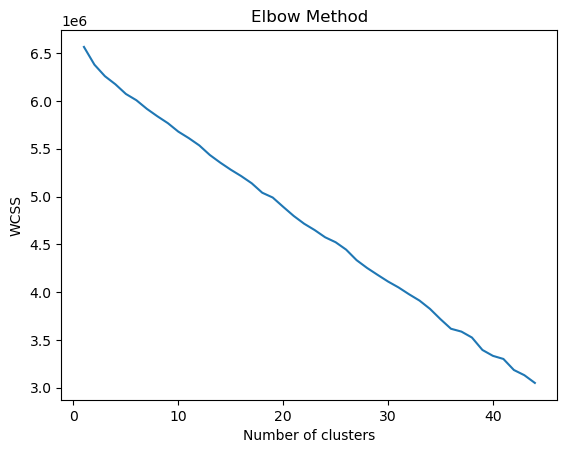

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow method to find a good number of clusters using WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 45):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data_95)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 45), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

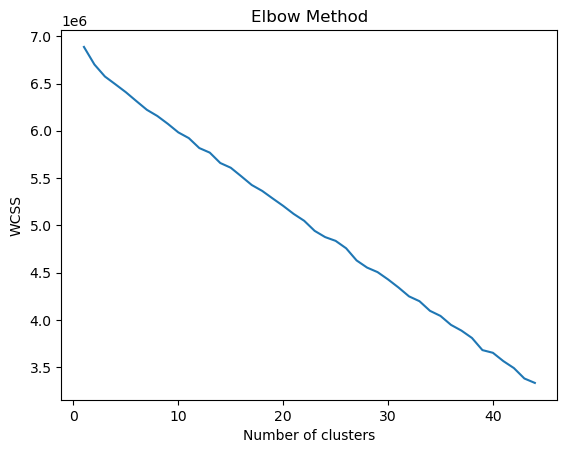

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow method to find a good number of clusters using WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 45):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 45), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()